___
# <div align=center>Pyomo Course</div>

**Main Source:** Pyomo — Optimization Modeling in Python **|** Springer **|** Third Editon (2021) **|** ISSN 1931-6828 **|**

**Pre-requisits:** An understanding of Python Programming language **|** Modeling and Optimization **|** Experience using Jupyter Notebooks **|**

**Alternatives to Pyomo:** GAMS (**General Algebraic Modeling System**) **|** AMPL (**A Mathematical Programming Language**) **|** SciPy (A scientific package developed for Python) **|**

For a through and complete understanding of the Pyomo package read its documentation **[here](https://pyomo.readthedocs.io/_/downloads/en/latest/pdf/)**.
___

___
## <div align=center>Section 1: *Introduction*</div>

**P**ython **O**ptimization **M**odeling **O**bjects or **Pyomo** is an optimization package with high level language (inherited from Python) designed for modeling and optimizing formulated problems tackled in a wide range of scientific fields.

The core of Pyomo is an object oriented capability for representing optimization models. This means each model is an object with its own attributes such as Sets, Variables and more.

Pyomo Supports formulation of common optimization models. Type of problems that this package can formulate and solve are but not limited to:
1. Linear programs (**LP**)
2. Mixed-integer programs (**MIP**)
3. Non-linear programs (**NLP**)
4. Mixed-integer non-linear programs (**MINLP**)
5. Mathematical problems with equilibrium constraints (**MPECs**)
6. Constraints and objectives based on differential equations

And more

Pyomo is a modeling language yet it hosts a *CLI* containing solver packages allowing the user to interact with solver results. To name a few:
1. CBC
2. CPLEX
3. Gurobi

Pyomo is an **ALM** or an **A**lgebraic **M**odeling **L**anguage. ALMs are high-level languages fir describing and solving optimization problems. Just like GAMS we use Pyomo to model a problem for the hosted solvers to solve and optimize. What separates this ALM from the other available options is its Pythonic nature, meaning integration to any code written in python and the open-source capabilities that python provides.

**<div align=center> Why do we need an ALM?</div>**

Without a language to specify optimization models, the process of writing input files, executing a solver, and extracting resolves from a solver is tedious and error-prone. On the solver side of optimization applications, we can have different acceptable input structures per solver while there is no real standard that these solvers adhere to. Troubleshooting communication problems arising from mis-input between the model and solver is nearly impossible without a high-level language.

Pyomo as an package extends Python to include objects for optimization modeling, these high-level objects are then translated to low-level languages (code) that can be processed by external solvers. Using Pyomo allows us to use Python features like concurrency by leveraging packages such as **Multi-processing** and **Asyncio**. 

In every optimization problem we need a grade of simplification which allow us to represent our *knowledge* in a structured way. This simplification help us to answer the following questions with less uncertainty:
1. What the system is?
2. What is the future state of our system?
3. What are the key factors (our knowledge in form of parameters) of the system?
4. How did we model the system? was it in a worst case scenario?

So a key aspect of a model to know before formulation is the required level of detail that we want to implement. To do so in formulations we have 3 main key concepts to make process of formulations as universal as possible:
1. Variables: These represent the unknown or the changing parts of the model
2. Parameters: Symbolic representation of real data, mostly the same during one instance of our model
3. Relations: Equations such as *constraints*, *bounds* and *objective functions* that are either linear or non-linear combinations of Variables and Parameters.

These relations can be taxing if the relations are mostly non-linear and complex so a lot of modelers seek to use linear relations as possible or opt to using linear approximations of the non-linear functions. 

Lets review some very simple optimization problems

<div align=center>

$min \ x_1 + 2x_2$

$s.t. \ 3x_1 + 4x_2 \ge 1$

$2x_1 + 5x_2 \ge 2$

$x_1, x_2 \ge 0$

</div>

If you are familiar with Python syntax you can easily replicate this LP problem to a Pyomo model in one cell of code but first install Pyomo by running the following command:

`!pip install pyomo`

* *Hint*: using the *!* in a jupyter notebook cell will run the command in the terminal e.g. `!pip install pyomo`. This will be useful later. While if you run it with *%* it will install in the same environment and not through a system wide terminal e.g. `%pip install pyomo`

In [1]:
%pip install pyomo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyomo.environ as pyo

# First we create a model instance, an object of the ConcreteModel class
model = pyo.ConcreteModel() 

# Then we create model variables
model.x_1 = pyo.Var(within=pyo.NonNegativeReals)
model.x_2 = pyo.Var(within=pyo.NonNegativeReals)

# Afterwards we assign a objective function to our model
model.obj = pyo.Objective(expr=model.x_1 + 2 * model.x_2)

# At the last step we create our constraints.
model.con1 = pyo.Constraint(expr=3 * model.x_1 + 4 * model.x_2 >= 1)
model.con2 = pyo.Constraint(expr=2 * model.x_1 + 5 * model.x_2 >= 2)

As simple as that we created our first Pyomo model in a very readable format.

This model was an object of the **ConcreteModel** class, this class initializes each model component (Variables, objective function and constraints) as they are added, as attributes of the model object.

Let's look at another LP with a more generalized formatting for formulation.

<div align=center>

$min \sum_{i=1}^{n}c_i x_i$

$ s.t. $

$ \sum_{i=1}^{n}a_{ji}x_i \ge b_j \space \forall j = 1\dots m$

$x_i \ge 0 \space \forall i = 1 \dots n$

</div>

This is quite a step up from the last LP that we formulated. There are scalar parameters of $n$, $m$ and $c$ and vector parameter of $a$. There are 2 ways of modeling this problem in pyomo:
1. `ConcreteModel`: The values for scalar and vector parameters are assigned to model before model initialization (basically running the model cell)
2. `AbstractModel`: The model holds a placeholder for the parameters and the values for scalar and vector parameters are assigned to the model after model initialization

We can read the parameter data in many different ways. One method to do so is to read them from a python file (.py) by importing the file. We create the file here, save it and import it. This is done so that we can replicate the process in other environments not just jupyter style (cell based) environments.

In [3]:
N = [1,2] # To define the acceptable range for N, we could have wrote list comprehension like N = [i for i in range(1,3)]
M = [1,2]

# We define scalar and vector parameters using a Python dictionary, defining the index(es) and the value as a key-value pair for each possible pair
c = {1:1, 2:2}
a = {(1,1):3, (1,2):4, (2,1):2, (2,2):5}
b = {1:1, 2:2}

Using a magic command we will save cell [7] as a python file named *mydata.py* that implements the necessary scalar and vector parameter data in the model.

In [5]:
%save "../Import Data/mydata.py" 3

The following commands were written to file `../Import Data/mydata.py`:
N = [1,2] # To define the acceptable range for N, we could have wrote list comprehension like N = [i for i in range(1,3)]
M = [1,2]

# We define scalar and vector parameters using a Python dictionary, defining the index(es) and the value as a key-value pair for each possible pair
c = {1:1, 2:2}
a = {(1,1):3, (1,2):4, (2,1):2, (2,2):5}
b = {1:1, 2:2}


Now we use a similar approach and define the model using `ConcreteModel()` first.

Here we first add the <b>Import Data</b> folder to our <b>PYTHONPATH</b> variable in order to access *mydata.py* from it.

In [7]:
import sys

sys.path.append("../Import Data/")

In [8]:
# 1.Importing Dependencies
import pyomo.environ as pyo
import mydata # Must be in our Current Working Directory (CWD)

# 2.Model creation
model = pyo.ConcreteModel()

# 3.Variable creation - We put the range for the x based on N which acts as the acceptable i values
model.x = pyo.Var(mydata.N, within=pyo.NonNegativeReals)

"""
4.Defining objective:
We define the objective as a function (rule as in the Pyomo terminology) 
and pass in the model as an argument so the function can access the model attributes
We create a minimize objective by calling the sense argument in the pyo.Objective function and pass to it pyo.minimize
"""
def obj_rule(model):
    return sum(mydata.c[i] * model.x[i] for i in mydata.N)
model.obj = pyo.Objective(rule=obj_rule, sense=pyo.minimize)

"""
5.Defining the constraint:
We define the constraint as a rule since we have a for all j in the model formulation.
The range for j is defined in the constrained attribute created by pyo.Constraint method
Pyomo expects a separate constraint for each index in mydata.M defined as m. This value is filled with the Constraint count
given to the pyo.Constraint() function
"""
def con_rule(model, m):
    return sum(mydata.a[m,i] * model.x[i] for i in mydata.N) >= mydata.b[m]
model.con = pyo.Constraint(mydata.M, rule=con_rule)

We can define the same problem using an Abstract approach using the `AbstractModel()` function to initialize the model and define the parameter values later.

In [10]:
# 1.Importing Dependencies
import pyomo.environ as pyo

# 2.Model creation
model = pyo.AbstractModel()

"""
3. Defining Parameters:
We define the indexes (i,j) as set not parameters using pyo.Set() function
We define scalar and vector parameters using the pyo.Param() function and specify which set (in order) is used in each parameter
So if one set is passed the function will create a scalar value and two is passed we will have a vector parameter on our hands.
"""

model.N = pyo.Set()
model.M = pyo.Set()

model.a = pyo.Param(model.M, model.N)
model.b = pyo.Param(model.M)
model.c = pyo.Param(model.N)

# 4. Defining variable
model.x = pyo.Var(model.N, within=pyo.NonNegativeReals)

# 5.Objective creation
def obj_rule(model):
    return sum(model.c[i] * model.x[i] for i in model.N)
model.obj = pyo.Objective(rule=obj_rule, sense=pyo.minimize)

# 6.Constraint creation
def con_rule(model, m):
    return sum(model.a[m,i] * model.x[i] for i in model.N) >= model.b[m]
model.con = pyo.Constraint(model.M, rule=con_rule)

We can fill the data in one of two ways:
1. Using the **data portal** module provided within the Pyomo package by calling each set and parameter and use an instance of `DataPortal()` function to lead each attribute.
2. Using a **.dat** file and creating a Concrete instance of the model using `create_instance()` function.
3. Other file formats such as Excel, YAML, JSON, CSVs or even through db queries.

We fill the data using a .dat file in this example and dive deeper to how to load the model with `DataPortal()` in later chapters.

Format of the .dat file is as followed:

We use the `.dat` file and create a **Concrete instance** of an **Abstract model** using `create_instance()` function.

In [12]:
concreteModel = model.create_instance('../Import Data/pyomo.dat')

Now that we created a *Concrete Instance* of our model we can solve the model.

There are 3 steps in total to solve a model with Pyomo:
1. Creating the model and combining the knowledge (data) with it (**Model Initialization**)
2. Sending the resulting *model instance* to a solver
3. Recover the results for displaying and further usage

Pyomo itself doesn't solve the model and rely on solver packages. In simple terms Pyomo works as an application programming interface (API) sending models to the solvers in their required format and receiving a creating a unified answer from the solvers output.

Let's see an example of how we can solve the very first example.

In [13]:
import pyomo.environ as pyo

model = pyo.ConcreteModel() 

model.x_1 = pyo.Var(within=pyo.NonNegativeReals)
model.x_2 = pyo.Var(within=pyo.NonNegativeReals)

model.obj = pyo.Objective(expr=model.x_1 + 2 * model.x_2)

model.con1 = pyo.Constraint(expr=3 * model.x_1 + 4 * model.x_2 >= 1)
model.con2 = pyo.Constraint(expr=2 * model.x_1 + 5 * model.x_2 >= 2)

In [14]:
# 1. Selecting a solver
opt = pyo.SolverFactory('glpk')

# 2. Solving the model
results = opt.solve(model)

"""
3. Checking the state of the answer
Using pyo.assert_optimal_termination() function will halt the script and outputs the message that the solver couldn't find the optimal solution
If we don't want to halt the progression and just assign it to a variable or use it in a conditional block we can use check_optimal_termination().
"""
pyo.assert_optimal_termination(results)

# Display the results
model.display()

Model unknown

  Variables:
    x_1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :  None : False : False : NonNegativeReals
    x_2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.4 :  None : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :   0.8

  Constraints:
    con1 : Size=1
        Key  : Lower : Body : Upper
        None :   1.0 :  1.6 :  None
    con2 : Size=1
        Key  : Lower : Body : Upper
        None :   2.0 :  2.0 :  None


We can run the cell and display the output or we can run this through a CLI by taking the following steps:

1. save as a `.py` file
2. run it in the terminal with the following command.

`python -m main.py`

In [16]:
%save "../Scripts/main.py" 13-14

The following commands were written to file `../Scripts/main.py`:
import pyomo.environ as pyo

model = pyo.ConcreteModel() 

model.x_1 = pyo.Var(within=pyo.NonNegativeReals)
model.x_2 = pyo.Var(within=pyo.NonNegativeReals)

model.obj = pyo.Objective(expr=model.x_1 + 2 * model.x_2)

model.con1 = pyo.Constraint(expr=3 * model.x_1 + 4 * model.x_2 >= 1)
model.con2 = pyo.Constraint(expr=2 * model.x_1 + 5 * model.x_2 >= 2)
# 1. Selecting a solver
opt = pyo.SolverFactory('glpk')

# 2. Solving the model
results = opt.solve(model)

"""
3. Checking the state of the answer
Using pyo.assert_optimal_termination() function will halt the script and outputs the message that the solver couldn't find the optimal solution
If we don't want to halt the progression and just assign it to a variable or use it in a conditional block we can use check_optimal_termination().
"""
pyo.assert_optimal_termination(results)

# Display the results
model.display()


<div align=center> <b>Extra Example:</b> Graph Coloring </div>

The graph coloring (Also known as vertex coloring) problem concernsthe assignment of colors to vertices of a graph such that no two adjacent (sharing an edge) share the same color. This is done with a integer programming (IP) formulation given below:

<div align=center>

$min \space y$
$s.t. \sum_{c \in C}x_{v,c} = 1 \space \forall v \in V$

$x_{v_1,c} + x_{v_2,c} \le 1 \space \forall (v_1,v_2) \in E$

$y \ge c.x_{v,c} \space \space \forall v \in V, \space c \in C$

$x_{v,c} \in {0,1} \space \space \forall v \in V, \space c \in C$
</div>

We can implement this formulation in Pyomo like this:

In [17]:
# 1. Define Graph data
vertices = set(['Ar', 'Bo', 'Br', 'Ch', 'Co', 'Ec', 'FG', 'Gu', 'Pa', 'Pe', 'Su', 'Ur', 'Ve'])

edges = set([('FG','Su'), ('FG','Br'), ('Su','Gu'),
             ('Su' ,'Br') , ('Gu','Ve') , ('Gu','Br'),
             ('Ve' ,'Co') , ('Ve' ,'Br') , ('Co' ,'Ec'),
             ('Co','Pe'), ('Co','Br'), ('Ec','Pe'),
             ('Pe','Ch'), ('Pe','Bo'), ('Pe','Br'),
             ('Ch','Ar') , ('Ch','Bo') , ('Ar' ,'Ur') ,
             ('Ar','Br') , ('Ar' ,'Pa') , ('Ar' ,'Bo'),
             ('Ur','Br'), ('Bo','Pa'), ('Bo','Br'),
             ('Pa','Br')])

# 2. Number of possible colors for the problem
ncolors = 4
colors = range(1, ncolors+1)

We can build the graph for better understanding of the problem at hand.

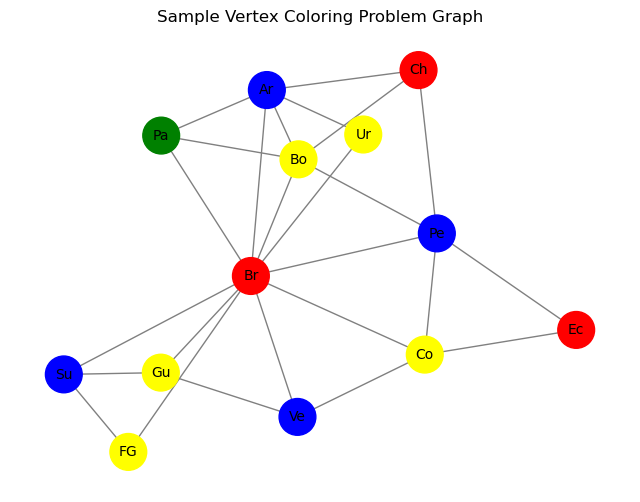

In [18]:
# Extra 1. Importing Dependencies

import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)

# Extra 2. Greedy color the graph (uses up to ncolors)
palette = ['red', 'blue', 'yellow', 'green']
coloring = nx.coloring.greedy_color(G, strategy='largest_first')
node_colors = [
    palette[coloring[node] % ncolors]
    for node in G.nodes()
]

# Extra 3. Graph creation
pos = nx.spring_layout(G, seed=40)
plt.figure(figsize=(8,6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Sample Vertex Coloring Problem Graph")
plt.axis('off')
plt.show()


In [19]:
# 3.Importing Dependencies
import pyomo.environ as pyo

# 4.Model creation
model = pyo.ConcreteModel()

# 5.Defining variables
model.x = pyo.Var(vertices, colors, within=pyo.Binary)
model.y = pyo.Var()

# 6.Objective creation
model.obj = pyo.Objective(expr=model.y, sense=pyo.minimize)

"""
7. Constraint definition:
We can use ConstraintList() function to define constraints without a predefined rule with the use of nested loops.
We first create an instance of a ConstraintList() and then use the .add() method through nested loops to create each constraint

First set of constraints prevents our nodes to be colored with more than one color
Second set of constraints prevents the nodes that share an edge to share a same color
Final set of constraints provide a lower bound on the minimum number of colors we need
"""
model.node_coloring = pyo.ConstraintList()
for v in vertices:
    model.node_coloring.add(sum(model.x[v,c] for c in colors) == 1)

model.edge_coloring = pyo.ConstraintList()
for v,w in edges:
    for c in colors:
        model.edge_coloring.add(model.x[v,c] + model.x[w,c] <= 1)

model.min_coloring = pyo.ConstraintList()
for v in vertices:
    for c in colors:
        model.min_coloring.add(model.y >= c * model.x[v,c])

**Conclusion**

To conclude Chapter 1 we will go over the reasons why Pyomo can be a good choice as your primary ALM whether you are a student or a researcher:
1. **Python:** An understandable high-level syntax and integration possibilities through the usage of a platera of packages.
2. **Customizable Capacity:** Pyomo has a framework plug-in that allows users to add the functionalities they want without destablizing the core functions.
3. **Command-Line Tools and Scripting:** Alongside scripting capabilities in your IDE or environment of choice pyomo is accessible through a CLI by just using `pyomo` command in your terminal of choice.
4. **Concrete and Abstract model definitions:** This allow user to define the model in two different ways dependent to the context. Both types can be initialized with various ways and through different file formats.
5. **Object-Oriebted Design:** Models are Python objects and the component of each model is defined as an attribute of the model object. This approach can help us seperate components of the same name through their model name. This models can have nested heirarchy through blocks which we tackle in the following chapters.
6. **Expressive modeling capability:** We can solve a wide range of optimization problems with the model created by Pyomo.
7. **Solver Integration:** There is 2 ways to use solvers with models whether through tightly coupled (linking to optimization solver libraries such as Gurobi or CPLEX that do not require external file creation) or loosely coupled (through system calls).
8. **Open Source:** The project is open source under the BSD license and carefully managed.

**<div align="center">End of Section 1.</div>**

___


___
## <div align=center> Section 2: *Pyomo Bits and Pieces* </div>

<hr />

<h3 align=center>Stage 1: Simple Pyomo Functions to Get You Started</h3>

In this section we will learn about Pyomo components and model capabilities. A model which is an object has components that allow us to create our desired formulation. These components consist of variable, objective functions, constraints, index sets and parameters which are present in most AMLs.

As stated in the previous chapter, solving any problem with Pyomo consists of 3 main steps:
1. Create an instance of a model using Pyomo modeling components
2. Pass this instance to solver to find a solution
3. Report and analyze results from the solver

We can use the Pythonic nature of Pyomo to create custom workflows that require optimizations.

We use the warehouse location problem in this chapter in order to take a deeper look at Pyomo *components*. The formulation for warehouse location problem is as followed. This problem seeks to find the optimal positioning of the warehouse in order to satisfy the most demand with optimizing transportation costs.

<div align=center>

$ min_{x,y} \sum_{n \in N} \sum_{m \in M} d_{n,m} x_{n,m}$

$s.t.$

$ \sum_{n \in N} x_{n,m} = 1 \space \forall \space m \in M $

$x_{n,m} \le y_n \space \forall \space n \in N \space, m \in M$

$\sum_{n \in N} y_n \le P$

$ 0 \le x \le 1$

$y \in \{0, 1\}$

</div>

**Problem parameters:**

P (maximum count of warehouse to be built) = 2

Customer locations (M) = {NYC, LA, Chicago, Houston}

Candidate warehouse locations (N) = {Harlingen, Memphis, Ashland}

$d_{n, m}$ which is the cost of transporting from warehouse n to the customer city of m.

<div align=center>

|           | NYC  |  LA  | Chicago | Houston |
|:----------|:----:|:----:|:-------:|:-------:|
| Harlingen | 1956 | 1606 |  1410   |   330   |
| Memphis   | 1096 | 1792 |  531    |   567   |
| Ashland   | 485  | 2322 |  324    |   1236  |

</div>

**<div align=center> Variable, Objective and Constraints Components</div>**

First to understand these components we look at a simple example and implement it in Pyomo. One for each component.

*variables* : $x$ (boundless), $y \in {-2,4}$ and $z\ge 0$ with and initial value of 1.

First we initialize a model instance and add each variable as an attribute to the model instance.

In [20]:
model = pyo.ConcreteModel()

$x \rightarrow$ Continuous. Added as a `pyo.Var()` attribute to the model instance

In [21]:
model.x = pyo.Var()

$y \rightarrow$ within a pre-specified range of -2 to 4. To assign a bound to a variable we use `bounds=` argument in `pyo.Var()`

In [22]:
model.y = pyo.Var(bounds=(-2,4))

$z \rightarrow $ a non-negative variable with an initial value. To give an initial value we use `initialize=` argument and to create $y \ge 0 $ in `within=`. We use `pyo.NonNegativeReals` which is a class that assigns a domain to the variable. We can use other types like `pyo.NonPositiveInteger`, `pyo.Binary` and more.

In [23]:
model.z = pyo.Var(initialize=1.0, within=pyo.NonNegativeReals)

Just like Variables we assign any function whether it be objective or constraint as another attribute for the model.

<div align=center> 

Objective function $ \rightarrow \min x^2 + y + z$  

Constraint function 1 $ \rightarrow x + z + y = 1 $

Constraint function 2 $ \rightarrow x + y \le 0 $

</div> 

We can use `pyo.Objective()` to define objective function, in which we can write either as a expression (using `expr=`) or as a rule (using `rule=`) that we pass a function to. With the use of `sense=` argument we tell the objective function whether to minimize (by passing `pyo.minimize` to the argument) or maximizing (by passing `pyo.maximize` to the argument). The default value for `sense=` is set as minimizing.


In [24]:
model.obj1 = pyo.Objective(expr=model.x**2 + model.y + model.z, sense=pyo.minimize)

# Or

def Objective_rule(model):
    return model.x**2 + model.y + model.z

model.obj2 = pyo.Objective(rule= Objective_rule, sense=pyo.minimize)

We can use `pyo.Constraint()` to define each constraint. We can use `expr=` or `rule=` just like the `pyo.Objective()` function. While using `pyo.Constraint()` we need to define the RHS which can be done after one of the `>=` greater than, `<=` lesser than and `==` equals.

In [25]:
model.const1 = pyo.Constraint(expr=model.x + model.y + model.z ==1)

# Or

def const_rule(model):
    return model.x + model.y + model.z ==1

model.const2 = pyo.Constraint(rule=const_rule)

Definition of the Constraint and Objectives through *Rules* are more common due to repetitive nature of these functions in most real world problems which usually have indexed variables and parameters.

Last example consisted of only Scalar (single and not indexed) variables. In the warehouse location problem we have indexed values such as $d_{n,m}$ which can be displayed as an matrix of values.
<div align=center>


|           | NYC  |  LA  | Chicago | Houston |
|:----------|:----:|:----:|:-------:|:-------:|
| Harlingen | 1956 | 1606 |  1410   |   330   |
| Memphis   | 1096 | 1792 |  531    |   567   |
| Ashland   | 485  | 2322 |  324    |   1236  | 


$
\downarrow
$ 
$$d_{n,m} = \begin{bmatrix}
1956 & 1606 & 1410 & 330\\
1096 & 1792 & 531 & 567\\
485 & 2322 & 324 & 1236
\end{bmatrix}
$$

</div>

Variable modeling can be done like $x_{Harlingen, NYC}, x_{Harlingen, LA}, \dots$

In [26]:
model = pyo.AbstractModel()

model.x_Harlingen_NYC = pyo.Var(bounds=(0,1))
model.x_Harlingen_LA  = pyo.Var(bounds=(0,1))
# ... until we create the rest which comes to a total of 12 variables.

If we want to create each indexed variable for each pair of warehouse (n) and city (m) it wouldn't be optimal, we need an iterative approach. We can formulate the problem using *indexed components*.

First we should create a list of **valid indexes**.

In [27]:
N = ['Harlingen', 'Memphis', 'Ashland']
M = ['NYC', 'LA', 'Chicago', 'Houston']

We then can create the $x_{n,m}$ and $y_{n}$ using the provided N and M index lists by calling the `pyo.Var()` and pass the amount of sets in the formulated index order (order is crucial). Afterwards we can pass the other arguments by calling the argument keyword.

In [28]:
model = pyo.ConcreteModel()

model.x = pyo.Var(N, M, bounds=(0,1))
model.y = pyo.Var(N, within=pyo.Binary)

Each value can be accessed through attribute indexing which is similar to NumPy. e.g `model.x[n,m]` since $x_{n,m}$ is a two-dimensional variable and will be stored as an array while to access each $y_{n}$ we can use `model.y[n]`. We should call the variable using it's indexes name.

In [29]:
model.x['Harlingen','NYC']

**Note:** Pyomo modeling components can include any number of index sets as unnamed arguments in their declaration but they must be speciﬁed before any other named keyword arguments. These index sets specify the valid indices for individual elements of the component.

Since the Variables are indexed now we can iterate over them in our functions whether it be Objective or Constraint.

We can rewrite the maximum number of warehouses constraint with a list comprehension.

In [30]:
P= 2

model.num_warehouse = pyo.Constraint(expr=(sum(model.y[n] for n in N) <= P))

The list comprehension will first create each $y_{n}$ using the `model.y[n]` and the indexes it reads from list N and sum over all of them and then compares it to N.

Step 1: Creation of all $y_{n}$ 's in a list $\rightarrow$ $ \begin{bmatrix} y_{Harlingen} & y_{Memphis} & y_{Ashland} \end{bmatrix} $

Step 2: Sum over the items of the list $\rightarrow \space \sum_{n \in \space N}(y_n) \rightarrow \space = \space y_{Harlingen} + y_{Memphis} + y_{Ashland} $

Step 3: LHS and RHS comparison $\rightarrow \space y_{Harlingen} + y_{Memphis} + y_{Ashland} \le 2 $

We can also use list comprehension on arrays with bigger ndims than 1.

In [31]:
import numpy as np

d = np.array([[1956, 1606, 1410, 330],
              [1096, 1792, 531, 567],
              [485, 2322, 324, 1236]], dtype=np.int16)

M_indexed = {name : m for m, name in enumerate(M)}
N_indexed = {name : n for n, name in enumerate(N)}

model.obj = pyo.Objective(expr=sum(d[N_indexed[n], M_indexed[m]] * model.x[n,m] for n in N for m in M))

**<div align=center> Using Construction Rules for Constraint and Objective Creation </div>**

The construction of many indexed constraints is performed with *construction rules*.

e.g.:

<div align=center> 

$ \sum_{n \in N} x_{n,m} = 1\space \forall m \in M $ 

</div> 

This formulation suggests there is a single constraint for any available pair of $x_{n,m}$. So for example we will have:

<div align=center> 

$ x_{Harlingen,NYC} + x_{Memphis,NYC} + x_{Ashland,NYC} = 1 $ 

$ x_{Harlingen, LA} + x_{Memphis, LA} + x_{Ashland, LA} = 1 $ 

$ x_{Harlingen, Chicago} + x_{Memphis, Chicago} + x_{Ashland, Chicago} = 1 $ 

$ x_{Harlingen, Houston} + x_{Memphis, Houston} + x_{Ashland, Houston} = 1 $ 

</div> 

We can see creating each one by one is tedious task, we can use rules to write one function and use the index used in $\forall \dots$ to create that many constraints.

We pass the model and in this example m (customer cities) defined in the formulation to the rule. `sum(model.x[n, m] for n in N) == 1 ` for a $m$ for example NYC is basically $x_{Harlingen,NYC} + x_{Memphis,NYC} + x_{Ashland,NYC} = 1 $. m should be passed as an argument to the rule from the `pyo.Constraint()` function to create M amounts of constraints.

In [32]:
def demand_rule(model, m): # This function will be called to produce the correct constraint expression for each M
    return sum(model.x[n, m] for n in N) == 1 

model.demand = pyo.Constraint(M, rule=demand_rule)

**<div align=center> Complete `pyo.ConcreteModel()` for The Warehouse Location Problem</div>**

Creating a model through a function (modular design) is preferable due to the fact that the function can be used to create another model with different sets of parameters and is highly reusable

In [33]:
def create_warehouse_model(N, M, d, P):

    # Importing Dependencies
    import pyomo.environ as pyo
    
    # Model Creation
    model = pyo.ConcreteModel(name="(WL)")

    # Variable Definition
    model.x = pyo.Var(N, M, bounds=(0,1))
    model.y = pyo.Var(N, within=pyo.Binary)

    # Objective Function Definition
    def obj_rule(model):
        return sum(d[n, m] * model.x[n,m] for n in N for m in M)
    model.obj = pyo.Objective(rule=obj_rule)

    # Constraint 1
    def demand_rule(model, m):
        return sum(model.x[n,m] for n in N) == 1
    model.demand = pyo.Constraint(M, rule=demand_rule)

    # Constraint 2
    def warehouse_active_rule(model,n, m):
        return model.x[n,m] <= model.y[n]
    model.warehouse_active = pyo.Constraint(N, M, rule=warehouse_active_rule)

    # Constraint 3
    def num_warehouse_rule(model):
        return sum(model.y[n] for n in N) <= P
    model.num_warehouse = pyo.Constraint(rule=num_warehouse_rule)

    # Function Output
    return model 

In [34]:
%save "../Scripts/warehouse_concrete_script.py" 33

The following commands were written to file `../Scripts/warehouse_concrete_script.py`:
def create_warehouse_model(N, M, d, P):

    # Importing Dependencies
    import pyomo.environ as pyo
    
    # Model Creation
    model = pyo.ConcreteModel(name="(WL)")

    # Variable Definition
    model.x = pyo.Var(N, M, bounds=(0,1))
    model.y = pyo.Var(N, within=pyo.Binary)

    # Objective Function Definition
    def obj_rule(model):
        return sum(d[n, m] * model.x[n,m] for n in N for m in M)
    model.obj = pyo.Objective(rule=obj_rule)

    # Constraint 1
    def demand_rule(model, m):
        return sum(model.x[n,m] for n in N) == 1
    model.demand = pyo.Constraint(M, rule=demand_rule)

    # Constraint 2
    def warehouse_active_rule(model,n, m):
        return model.x[n,m] <= model.y[n]
    model.warehouse_active = pyo.Constraint(N, M, rule=warehouse_active_rule)

    # Constraint 3
    def num_warehouse_rule(model):
        return sum(model.y[n] for n in N) <= P
    model.num_war

One instance parameters:

**Reminder:** If you didn't append the Scripts Folder to the Python path variable (Temporarily) the following cell will not work

In [36]:
import sys

sys.path.append("../Scripts/")

In [37]:
# wm_concrete_script.py
# Solve an instance of the warehouse location problem

# Importing Dependencies
import pyomo.environ as pyo
from warehouse_concrete_script import create_warehouse_model

# Establish the data for the model

N = ['Harlingen', 'Memphis', 'Ashland']
M = ['NYC', 'LA', 'Chicago', 'Houston']

d = {('Harlingen', 'NYC'): 1956, 
     ('Harlingen', 'LA'): 1606,
     ('Harlingen', 'Chicago'): 1410,
     ('Harlingen', 'Houston'): 330,
     ('Memphis', 'NYC'): 1096,
     ('Memphis', 'LA'): 1792,
     ('Memphis', 'Chicago'): 531,
     ('Memphis', 'Houston'): 567,
     ('Ashland', 'NYC'): 485,
     ('Ashland', 'LA'): 2322,
     ('Ashland', 'Chicago'): 324,
     ('Ashland', 'Houston'): 1236}

P = 2

# Create Pyomo model
model = create_warehouse_model(N, M, d, P)

# Create the solver interface and solve the model
solver = pyo.SolverFactory('glpk')
results = solver.solve(model)

# Make sure that the returned values are the optimal ones (if an optimal answer exists)
pyo.assert_optimal_termination(results)

model.y.pprint()

y : Size=3, Index={Harlingen, Memphis, Ashland}
    Key       : Lower : Value : Upper : Fixed : Stale : Domain
      Ashland :     0 :   1.0 :     1 : False : False : Binary
    Harlingen :     0 :   1.0 :     1 : False : False : Binary
      Memphis :     0 :   0.0 :     1 : False : False : Binary


Solution shows the best place to place our warehouses are at Ashland and Harlingen.

<code>model.pprint()</code> will print the result in a summarized order consisting of constraints and objective functions. The whole function output is given in the next cell.

In [38]:
model.pprint()

2 Var Declarations
    x : Size=12, Index={Harlingen, Memphis, Ashland}*{NYC, LA, Chicago, Houston}
        Key                      : Lower : Value : Upper : Fixed : Stale : Domain
          ('Ashland', 'Chicago') :     0 :   1.0 :     1 : False : False :  Reals
          ('Ashland', 'Houston') :     0 :   0.0 :     1 : False : False :  Reals
               ('Ashland', 'LA') :     0 :   0.0 :     1 : False : False :  Reals
              ('Ashland', 'NYC') :     0 :   1.0 :     1 : False : False :  Reals
        ('Harlingen', 'Chicago') :     0 :   0.0 :     1 : False : False :  Reals
        ('Harlingen', 'Houston') :     0 :   1.0 :     1 : False : False :  Reals
             ('Harlingen', 'LA') :     0 :   1.0 :     1 : False : False :  Reals
            ('Harlingen', 'NYC') :     0 :   0.0 :     1 : False : False :  Reals
          ('Memphis', 'Chicago') :     0 :   0.0 :     1 : False : False :  Reals
          ('Memphis', 'Houston') :     0 :   0.0 :     1 : False : False :  Real

We can read and initiate a model instance and parameters from `XSLX` or excel files, `JSON` file formats, `YAML` and much more but this a concise Pyomo course not a Python course.

<h2 align=center>Modeling Components for Sets and Parameters</h2>

Pyomo includes modeling components `pyo.Set()` and `pyo.Param()` to define index sets and parameters. A Pyomo `Set` component is used declare valid indices for any indexed component. For the shown example above we can recreate the model using sets and parameters.

<ul>

<li><b>N</b>: Stores the valid warehouse locations</li>
<li><b>M</b>: Stores the customer locations</li>

</ul>

We can create each set like `pyo.Set()` and assign each to the respective variable

In [39]:
model = pyo.ConcreteModel()
model.N = pyo.Set()
model.M = pyo.Set()

We can use `initialize=` argument to initialize the Set with Python sets, lists or tuples.

In [40]:
model = pyo.ConcreteModel()
model.N = pyo.Set(initialize=N)
model.M = pyo.Set(initialize=M)

Sets can be indexed by other sets by passing the set to the input of a another `pyo.Set()` set created and stored in a variable.

For example:

<div  style="background-color: lightgray;">
<code style="color= black;">

model.set1 = pyo.Set() <br />
model.set2 = pyo.Set(model.set1)

</code>
</div>

Now that the model.set1 is initialized and imagine it has the values 1,2,3 and the values of `model.set1['1']` has the set 2 indices like A and B assigned to it while `model.set1['2']` has B, C and D.

Pyomo Parameters defined as `pyo.Params()` can be used to define values for this problem. In the context of the example problem solved above we can declare parameters as the following. To know how many parameters are in a vector or matrix we can pass the set attributes to the `pyo.Params()` function. Every set item will be mixed with every other sets items and we can expect a vector of $n \times m$ vector size, so for the warehouse problem with 4 different customer cities and 3 different possible warehouse locations we can have a $4 \times 3$ parameter vector for **d** if we pass both sets.

In [41]:
model.P = pyo.Param() # declares a scalar parameter
model.d = pyo.Param(model.N, model.M) # declares a 3 * 4 matrix

As with the `pyo.Set()` object the `pyo.Param()` can be filled with values using a python dictionary and the use of `initialize=` argument.

By default, parameters are immutable, meaning once their values are set, these values cannot be changed. This default behavior allows for increased efficiency within Pyomo when handling expressions. However, a parameter whose values are mutable can be defined with the `mutable=True` keyword argument in `pyo.Param()` or `pyo.Set()` functions. This can be useful if a model should be solved multiple times with different values of some of the parameters.

In the following code cells we will rewrite the warehouse problem this time with sets and parameters and reading the data from an excel file.

In [42]:
# warehouse_mutable.py: warehouse location problem with mutable parameters

# Importing dependencies
import pyomo.environ as pyo

# Model creation function
def create_warehouse_model(N, M, d, P):
    model = pyo.ConcreteModel(name= "(WL)")

    # Model variable creation
    model.x = pyo.Var(N, M, bounds=(0,1))
    model.y = pyo.Var(N, within=pyo.Binary)
    model.P = pyo.Param(initialize=P, mutable=True)

    # Objective function rule
    def obj_rule(model):
        return sum(d[n,m] * model.x[n,m] for n in N for m in M)
    model.obj = pyo.Objective(rule=obj_rule)

    # Defining Constraints
    def demand_rule(model, m):
        return sum(model.x[n,m] for n in N) == 1
    model.demand = pyo.Constraint(M, rule=demand_rule)

    def warehouse_active_rule(model, n, m):
        return model.x[n, m] <= model.y[n]
    model.warehouse_active = pyo.Constraint(N, M, rule=warehouse_active_rule)

    def num_warehouses_rule(model):
        return sum(model.y[n] for n in N) <= model.P
    model.num_warehouses = pyo.Constraint(rule=num_warehouses_rule)

    return model

In [44]:
%save "../Scripts/warehouse_mutable.py" 42

The following commands were written to file `../Scripts/warehouse_mutable.py`:
# warehouse_mutable.py: warehouse location problem with mutable parameters

# Importing dependencies
import pyomo.environ as pyo

# Model creation function
def create_warehouse_model(N, M, d, P):
    model = pyo.ConcreteModel(name= "(WL)")

    # Model variable creation
    model.x = pyo.Var(N, M, bounds=(0,1))
    model.y = pyo.Var(N, within=pyo.Binary)
    model.P = pyo.Param(initialize=P, mutable=True)

    # Objective function rule
    def obj_rule(model):
        return sum(d[n,m] * model.x[n,m] for n in N for m in M)
    model.obj = pyo.Objective(rule=obj_rule)

    # Defining Constraints
    def demand_rule(model, m):
        return sum(model.x[n,m] for n in N) == 1
    model.demand = pyo.Constraint(M, rule=demand_rule)

    def warehouse_active_rule(model, n, m):
        return model.x[n, m] <= model.y[n]
    model.warehouse_active = pyo.Constraint(N, M, rule=warehouse_active_rule)

    def num_wareh

In [46]:
#  warehouse_mutable_excel.py:  solve  problem  with  different  values  for  P

# Importing Dependencies
import pandas as pd
import pyomo.environ  as  pyo
from warehouse_mutable  import  create_warehouse_model


# Read  the  data  from  Excel  using  Pandas
df  =  pd.read_excel('../Import Data/warehouse_data.xlsx',  sheet_name='Delivery', header=0, index_col=0)

# 
N  =  list(df.index.map(str))
M  =  list(df.columns.map(str))
d  =  {(r,  c):df.at[r,c]  for  r  in  N  for  c  in  M} 

P=2

#  create  the  Pyomo  model
model  =  create_warehouse_model(N,  M,  d,  P)

#  create  the  solver  interface
solver  =  pyo.SolverFactory('glpk')

#  loop  over  values  for  mutable  parameter  P for  n  in  range(1,10):
for n in range(1,4):
    model.P  =  n
    res  =  solver.solve(model)
    pyo.assert_optimal_termination(res)
    print(f'# warehouses: {n} warehouses selected with delivery  cost:',  pyo.value(model.obj))
    print("# Warehouses selected:")
    print(model.y.pprint())

# warehouses: 1 warehouses selected with delivery  cost: 3986.0
# Warehouses selected:
y : Size=3, Index={Harlingen, Memphis, Ashland}
    Key       : Lower : Value : Upper : Fixed : Stale : Domain
      Ashland :     0 :   0.0 :     1 : False : False : Binary
    Harlingen :     0 :   0.0 :     1 : False : False : Binary
      Memphis :     0 :   1.0 :     1 : False : False : Binary
None
# warehouses: 2 warehouses selected with delivery  cost: 2745.0
# Warehouses selected:
y : Size=3, Index={Harlingen, Memphis, Ashland}
    Key       : Lower : Value : Upper : Fixed : Stale : Domain
      Ashland :     0 :   1.0 :     1 : False : False : Binary
    Harlingen :     0 :   1.0 :     1 : False : False : Binary
      Memphis :     0 :   0.0 :     1 : False : False : Binary
None
# warehouses: 3 warehouses selected with delivery  cost: 2745.0
# Warehouses selected:
y : Size=3, Index={Harlingen, Memphis, Ashland}
    Key       : Lower : Value : Upper : Fixed : Stale : Domain
      Ashland :   

<hr />
<h2 align=center>Stage 2: A deeper dive into each Pyomo component and its arguments</h2>
